# The Zeeman Effect #

The Zeeman Effect is the name given to the phenonmenon of the splitting of spectral lines due to the presence of an electric field. This notebook processes experimental data from a lab investigation of the Zeeman Effect. It includes data import, visualisation, linear regression, and interpretation of the splitting of spectral lines in a magnetic field. A comprehensive overview of the theory and the interpretation of the results can be found in the corresponding lab report.

### Experiment 1: Determining the wavelength of the cadmium red line. ###

The Zeeman effect was invetsigated with a Cadmium light source. The data was imported as a csv file containing the data of pixel number and intensity, taken during the 12 hour lab session.


In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import scipy.constants as const
import scienceplots 

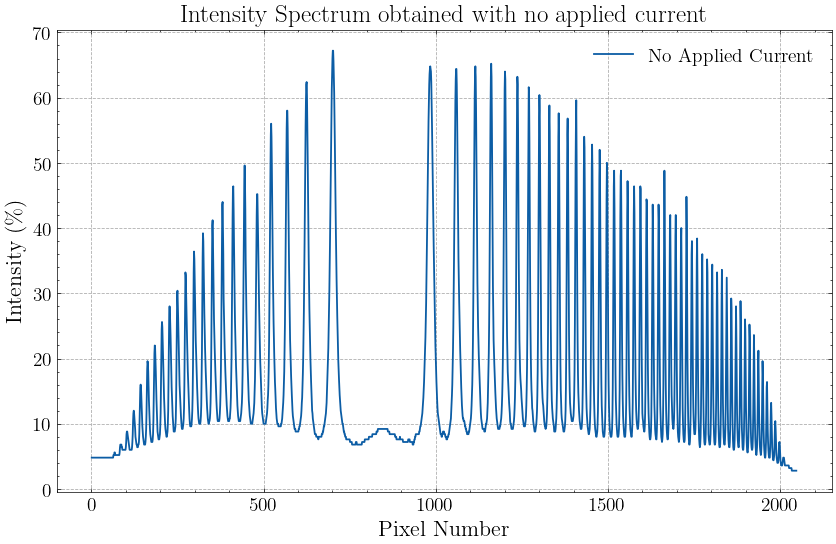

In [2]:
I0 = pd.read_csv(r"C:\Users\Ellen Lyons\OneDrive\JS Physics\Labs\Zeeman Effect\csv files\I=0.csv",dtype={"Pixel Number": float, "Intensity": float})
I0.columns = ["Pixel Number", "Intensity"]
#print(df.head())

plt.figure(figsize=(10,6))
plt.style.use('science')
plt.plot(I0["Pixel Number"], I0["Intensity"], label="No Applied Current",linewidth=1.3)
plt.xlabel("Pixel Number", fontsize=16)
plt.ylabel(r"Intensity ($\%$)", fontsize=16)
plt.title("Intensity Spectrum obtained with no applied current", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.6)
plt.legend(fontsize=14)
#plt.xlim(300,1500)

plt.show()


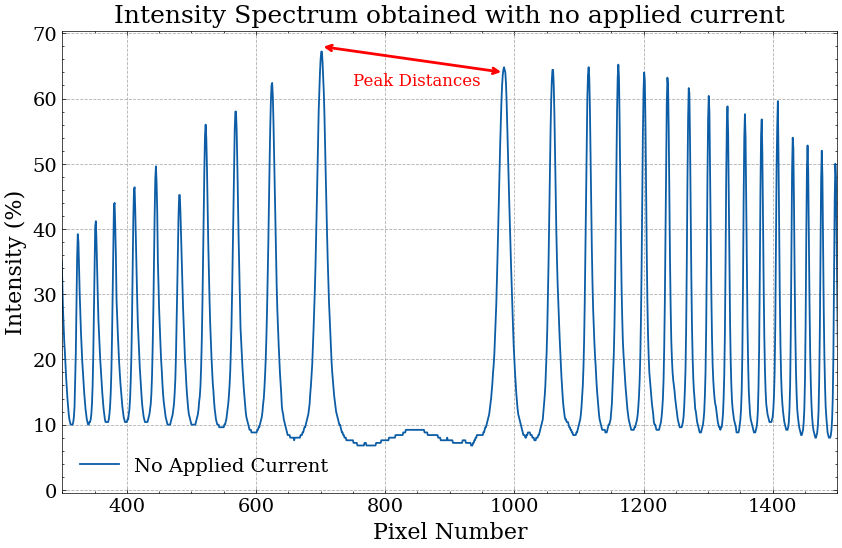

In [3]:
# we retook the data for exp 1 
dfnew = pd.read_csv(r"C:\Users\Ellen Lyons\OneDrive\JS Physics\Labs\Zeeman Effect\csv files\I=0.csv",dtype={"Pixel Number": float, "Intensity": float})
dfnew.columns = ["Pixel Number", "Intensity"]
#print(df.head())

plt.figure(figsize=(10,6))
plt.style.use('science')
plt.rcParams["text.usetex"] = False
plt.plot(dfnew["Pixel Number"], dfnew["Intensity"], label="No Applied Current",linewidth=1.3)
plt.annotate(
    "",  # No text
    xy=(700, 68),  # Right endpoint of the arrow
    xytext=(984, 64),  # Left endpoint of the arrow
    arrowprops=dict(arrowstyle='<->', color='red', linewidth=2)
)
plt.text(750, 62, "Peak Distances", fontsize=12, color='red')
plt.xlabel("Pixel Number", fontsize=16)
plt.ylabel("Intensity (%)", fontsize=16)
plt.title("Intensity Spectrum obtained with no applied current", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.6)
plt.legend(fontsize=14)
plt.xlim(300,1500)

plt.show()


Using values obtained during the lab session, order number *m* is plotted against ring radii squared $ r_m^2 $ and a linear fit is applied.

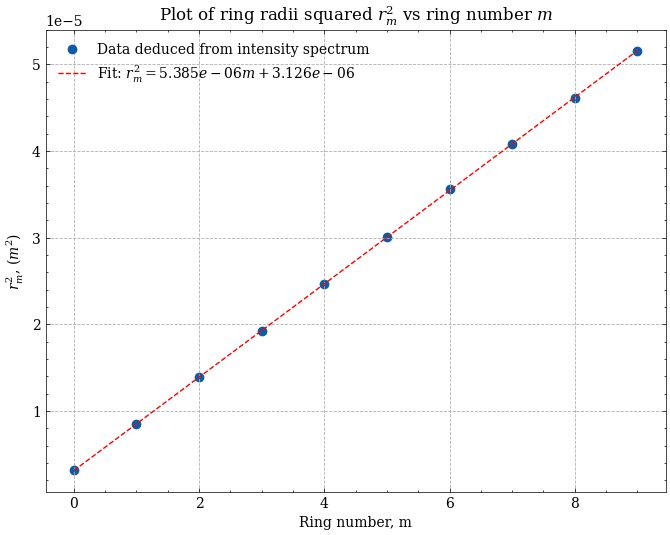

Slope = 5.385e-06 (m^2 per ring)


In [4]:
m = np.arange(0,10 , 1)
r_m_sq=np.array([
3.136441,
8.479744,
13.868176,
19.263321,
24.7009,
30.041361,
35.569296,
40.86277776,
46.1041,
51.581124])*1e-6

# Perform linear fit
slope, intercept = np.polyfit(m, r_m_sq, deg=1)

# Generate fitted line for plotting
fitted_values = slope * m + intercept

plt.figure(figsize=(8,6))
plt.scatter(m, r_m_sq, label ='Data deduced from intensity spectrum')
plt.plot(m, fitted_values, color='red', linestyle='--',
         label=f"Fit: $r_m^2 = {slope:.3e}m + {intercept:.3e}$")
plt.grid(True, linestyle="--", linewidth=0.6)
plt.xlabel('Ring number, m')
plt.ylabel(r'$r_m^2 $, $(m^2)$')
plt.title(r'Plot of ring radii squared $r_m^2$ vs ring number $m$')
plt.legend()
plt.show()

print(f"Slope = {slope:.3e} (m^2 per ring)")




The slope of this plot is used to calculate the wavelength of Cadmium red. 

In [5]:
# calculating lambda 
d = 4e-3 #etalon thickness in m 
n = 1.457 #refractive index
f = 0.15 #focal length of lens

wl = (slope * d) / (n * (f**2))

print(f'wavelength of cadmium = {wl:3e} m')

wavelength of cadmium = 6.571163e-07 m


### Experiment 2: Transversal Normal Zeeman Effect

#### Intensity Spectra ####

A current is applied to the set-up to induce a magnetic field. The effect of increasing the current was analysed.

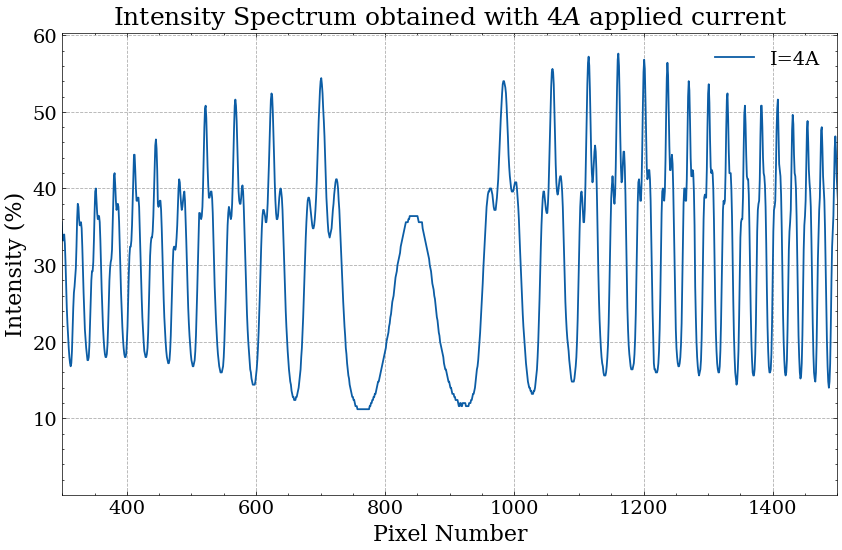

In [6]:
I4 = pd.read_csv(r"C:\Users\Ellen Lyons\OneDrive\JS Physics\Labs\Zeeman Effect\csv files\I=4.csv")
I4.columns = ["Pixel Number", "Intensity"]
I4["Intensity"] = pd.to_numeric(I4["Intensity"], errors="coerce")  # Converts text to NaN if needed
I4 = I4.dropna()  # Remove any invalid values
#print(df.head()) 


plt.figure(figsize=(10,6))
plt.plot(I4["Pixel Number"], I4["Intensity"], label="I=4A",linewidth=1.3)
plt.xlabel("Pixel Number", fontsize=16)
plt.ylabel("Intensity (%)", fontsize=16)
plt.title(r"Intensity Spectrum obtained with $4A$ applied current", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.6)
plt.legend(fontsize=14)
plt.xlim(300,1500)

plt.show()

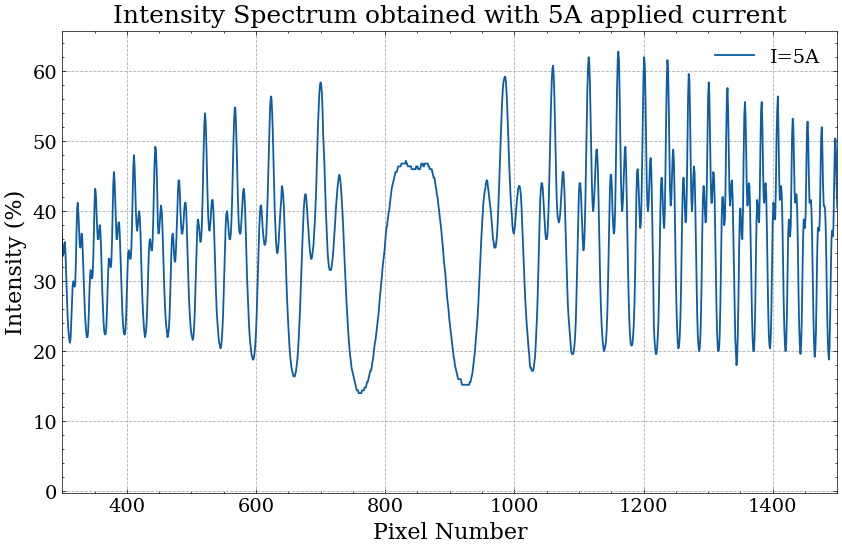

In [7]:
I5 = pd.read_csv(r"C:\Users\Ellen Lyons\OneDrive\JS Physics\Labs\Zeeman Effect\csv files\I=5.csv")
I5.columns = ["Pixel Number", "Intensity"]
#print(df.head())

plt.figure(figsize=(10,6))
plt.plot(I5["Pixel Number"], I5["Intensity"], label="I=5A", linewidth=1.3)
plt.xlabel("Pixel Number", fontsize=16)
plt.ylabel("Intensity (%)", fontsize=16)
plt.title("Intensity Spectrum obtained with 5A applied current", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.6)
plt.legend(fontsize=14)
plt.xlim(300,1500)

plt.show()


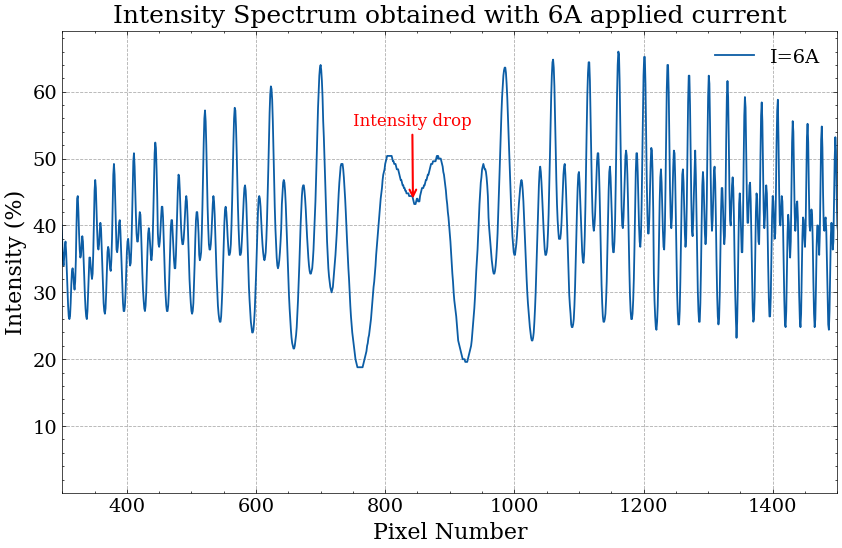

In [8]:
I6=pd.read_csv(r"C:\Users\Ellen Lyons\OneDrive\JS Physics\Labs\Zeeman Effect\csv files\I=6.csv")
I6.columns=["Pixel Number", "Intensity"]

plt.figure(figsize=(10,6))
plt.plot(I6["Pixel Number"], I6["Intensity"], label="I=6A", linewidth=1.3)
plt.annotate("Intensity drop", xy=(843, 43.6), xytext=(750, 55),
             arrowprops=dict(edgecolor = 'red', facecolor='red', arrowstyle='->', lw=1.5),
             fontsize=12, color = 'red')
plt.xlabel("Pixel Number", fontsize=16)
plt.ylabel("Intensity (%)", fontsize=16)
plt.title("Intensity Spectrum obtained with 6A applied current", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.6)
plt.legend(fontsize=14)
plt.xlim(300,1500)

plt.show()

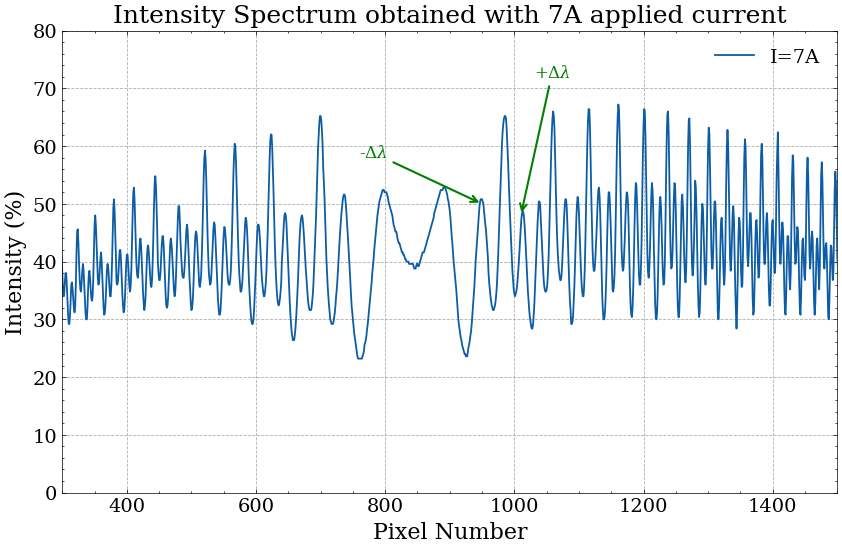

In [9]:
I7 = pd.read_csv(r"C:\Users\Ellen Lyons\OneDrive\JS Physics\Labs\Zeeman Effect\csv files\I=7.csv")
I7.columns=["Pixel Number", "Intensity"]

plt.figure(figsize=(10,6))
plt.plot(I7["Pixel Number"], I7["Intensity"], label="I=7A", linewidth=1.3)
plt.annotate(r'-$\Delta \lambda$', xy=(950, 50), xytext=(760, 58),
             arrowprops=dict(edgecolor = 'green', facecolor='green', arrowstyle='->', lw=1.5),
             fontsize=12, color="green")
plt.annotate(r'$+\Delta \lambda$', xy=(1010, 48), xytext=(1030, 72),
             arrowprops=dict(edgecolor = 'green', facecolor='green', arrowstyle='->', lw=1.5),
             fontsize=12, color="green")
plt.xlabel("Pixel Number", fontsize=16)
plt.ylabel("Intensity (%)", fontsize=16)
plt.title("Intensity Spectrum obtained with 7A applied current", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.6)
plt.legend(fontsize=14)
plt.ylim(0,80)
plt.xlim(300,1500)

plt.show()

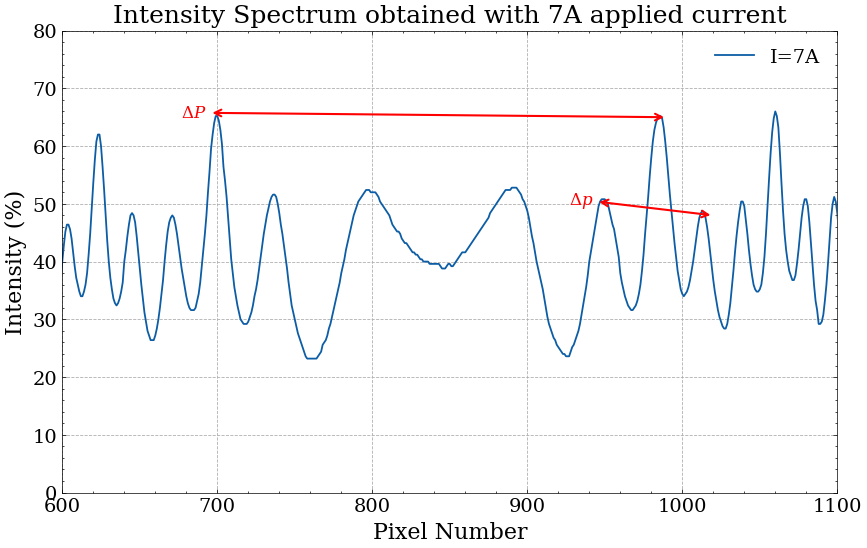

In [10]:
# replotting with new scale and different annotations
plt.figure(figsize=(10,6))
plt.plot(I7["Pixel Number"], I7["Intensity"], label="I=7A", linewidth=1.3)
plt.annotate(r'$\Delta P$', 
             xy=(990,65),  # End point of the arrow
             xytext=(685,65),  # Start point of the arrow
             arrowprops=dict(arrowstyle='<->', lw=1.5, color='red'),
             fontsize=12, color='red', ha='center')
plt.annotate(r'$\Delta p$', 
             xy=(1020,48),  # End point of the arrow
             xytext=(935,50),  # Start point of the arrow
             arrowprops=dict(arrowstyle='<->', lw=1.5, color='red'),
             fontsize=12, color='red', ha='center')

plt.xlabel("Pixel Number", fontsize=16)
plt.ylabel("Intensity (%)", fontsize=16)
plt.title("Intensity Spectrum obtained with 7A applied current", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.6)
plt.legend(fontsize=14)
plt.ylim(0,80)
plt.xlim(600,1100)
#mplcursors.cursor(hover=True)
plt.savefig(r"C:\Users\Ellen Lyons\OneDrive\JS Physics\Labs\Zeeman Effect\plots\exp2.arrows.png", dpi=300, bbox_inches="tight")

plt.show()

The plots above have various different annotations added which are helpful when explaining methodology and theory in the lab report. The red arrows above indicate how the pixel differences were calculated (and later convereted to ring radii valued). The green arrows on the previous plot are indiciative of the polarisation state of the transverse Zeeman effect.

The magnetic field $ B $ is plotted against $ r \Delta r $ -- where $ r $ corresponds to $ \Delta P $ and $ \Delta r $ corresponds to $ \Delta p $ on the intensity spectra above. 

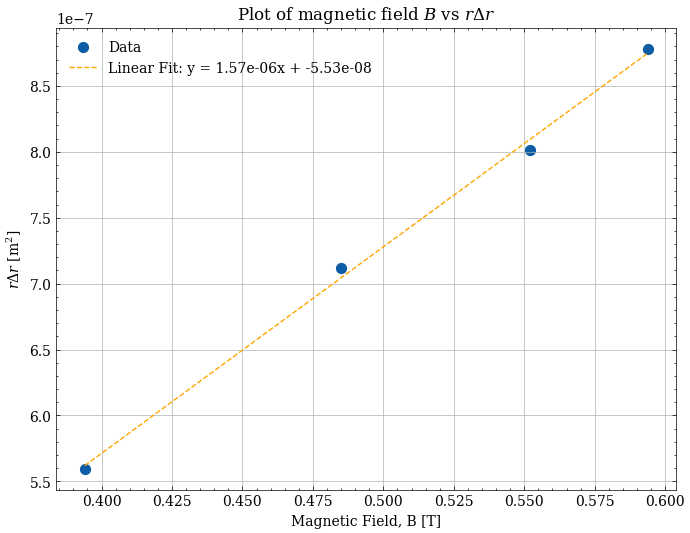

In [11]:
# Data
B = np.array([0.394, 0.485, 0.552, 0.594])
rdr = np.array([0.5597102583, 0.7115453333, 0.8013215, 0.8783495])*1e-6

# Linear fit
slope, intercept = np.polyfit(B, rdr, deg=1) 

plt.figure(figsize=(8,6))
plt.scatter(B, rdr, s=50, label="Data")  
plt.plot(B, slope * B + intercept, linestyle='--', 
         label=f"Linear Fit: y = {slope:.2e}x + {intercept:.2e}", color = 'orange')

plt.xlabel("Magnetic Field, B [T]")
plt.ylabel(r'$r\Delta r$ [m$^2$]')
plt.title(r'Plot of magnetic field $B$ vs $r \Delta r$')
plt.legend()
plt.grid(True)

plt.show()

The slope of the plot can be used to deduce a value of the Bohr magneton.

In [12]:
# Constants
lambda_0 = 643.84e-9  # Cadmium red line wavelength in meters
n = 1.457
f = 150e-3
# Compute the Bohr magneton (μ_B)
mu_B = (slope * const.h * const.c) / (lambda_0 * (n**2) * (f**2))
# Display the result
print(f"Calculated Bohr Magneton: {mu_B:} J/T")


Calculated Bohr Magneton: 1.0119193454402251e-23 J/T


The percentage error can also be computed. 

In [13]:
actual_mu_B = 9.2740100783e-24  # J/T

# Calculate percentage error
percent_error = abs((mu_B - actual_mu_B) / actual_mu_B) * 100

# Display result
print(percent_error,'% error')

9.11346191093615 % error


#### Polarisation ####

The polarisation state of the transverse Zeeman effect is assessed. Linear polariser and quarter wave plate are given in the lab for this purpose. 


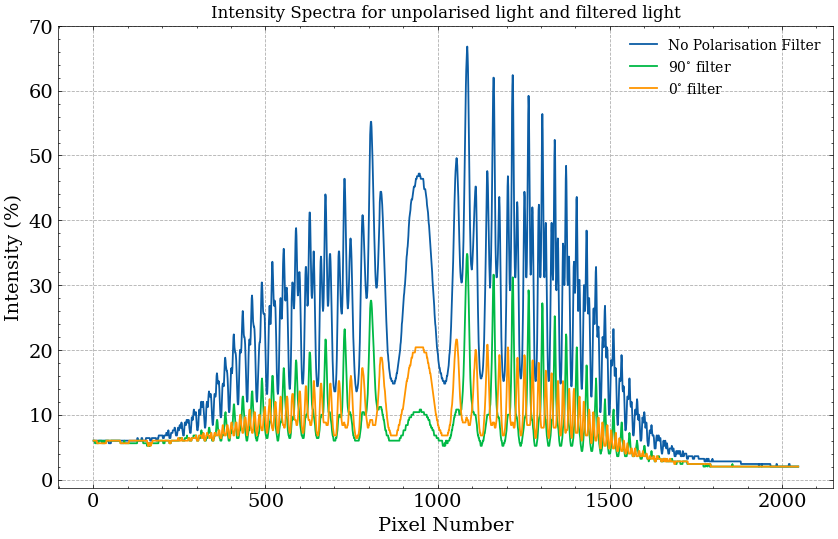

In [14]:
df = pd.read_csv(r"C:\Users\Ellen Lyons\OneDrive\JS Physics\Labs\Zeeman Effect\csv files\zeeman.nofilter (1).csv",dtype={"Pixel Number": float, "Intensity": float})
df.columns = ["Pixel Number", "Intensity"]

df2 = pd.read_csv(r"C:\Users\Ellen Lyons\OneDrive\JS Physics\Labs\Zeeman Effect\csv files\zeeman.90.csv", dtype={"Pixel Number": float, "Intensity": float})
df2.columns = ["Pixel Number", "Intensity"]

df3 = pd.read_csv(r"C:\Users\Ellen Lyons\OneDrive\JS Physics\Labs\Zeeman Effect\csv files\zeeman.0.csv", dtype={"Pixel Number": float, "Intensity": float})
df3.columns = ["Pixel Number", "Intensity"]\

plt.figure(figsize=(10,6))
plt.style.use('science')
plt.rcParams["text.usetex"] = False
plt.plot(df["Pixel Number"], df["Intensity"], label="No Polarisation Filter",linewidth=1.3)
plt.plot(df2["Pixel Number"], df2["Intensity"], label=r'$90^{\circ}$ filter',linewidth=1.3)
plt.plot(df3["Pixel Number"], df3["Intensity"], label=r'$0^{\circ}$ filter',linewidth=1.3)
plt.xlabel("Pixel Number", fontsize=14)
plt.ylabel("Intensity (%)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(r'Intensity Spectra for unpolarised light and filtered light')
plt.grid(True, linestyle="--", linewidth=0.6)
plt.legend()

plt.show()

### Experiment 3: Longitudinal Zeeman Effect ###
#### Intensity Spectra ####

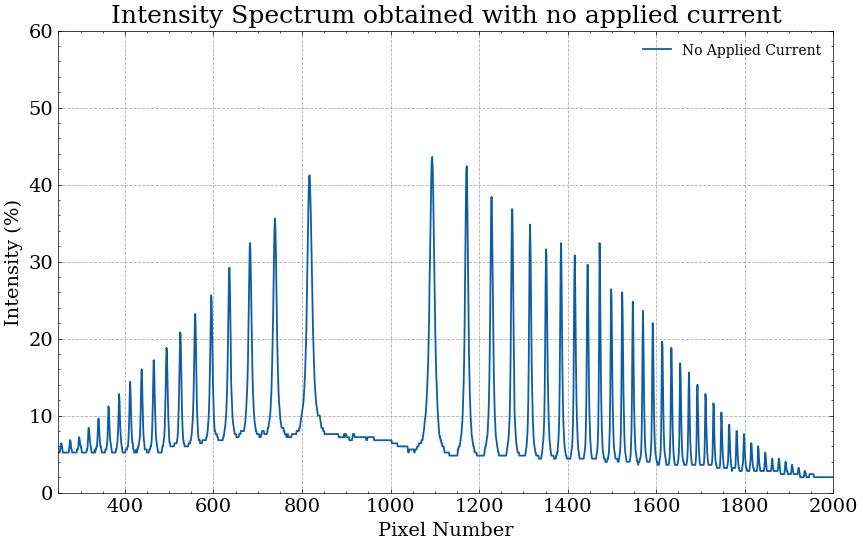

In [33]:
I0_long = pd.read_csv(r"C:\Users\Ellen Lyons\OneDrive\JS Physics\Labs\Zeeman Effect\csv files\zeeman.exp3.0A.csv")
I0_long.columns = ["Pixel Number", "Intensity"]

plt.figure(figsize=(10,6))
plt.plot(I0_long["Pixel Number"], I0_long["Intensity"], label="No Applied Current",linewidth=1.3)
plt.xlabel("Pixel Number", fontsize=14)
plt.ylabel("Intensity (%)", fontsize=14)
plt.title("Intensity Spectrum obtained with no applied current", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.6)
plt.legend()
plt.ylim(0,60)
plt.xlim(250,2000)

plt.show()

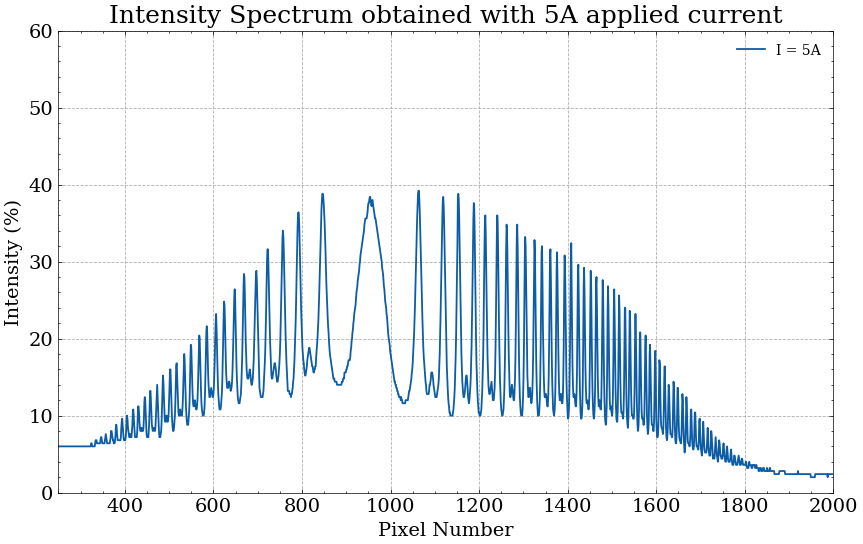

In [15]:
# intensity speCtra 
I5_long = pd.read_csv(r"C:\Users\Ellen Lyons\OneDrive\JS Physics\Labs\Zeeman Effect\csv files\zeeman.exp3.5A.csv")
I5_long.columns = ["Pixel Number", "Intensity"]

plt.figure(figsize=(10,6))
plt.plot(I5_long["Pixel Number"], I5_long["Intensity"], label="I = 5A",linewidth=1.3)
plt.xlabel("Pixel Number", fontsize=14)
plt.ylabel("Intensity (%)", fontsize=14)
plt.title("Intensity Spectrum obtained with 5A applied current", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.6)
plt.legend()
plt.ylim(0,60)
plt.xlim(250, 2000)

plt.show()

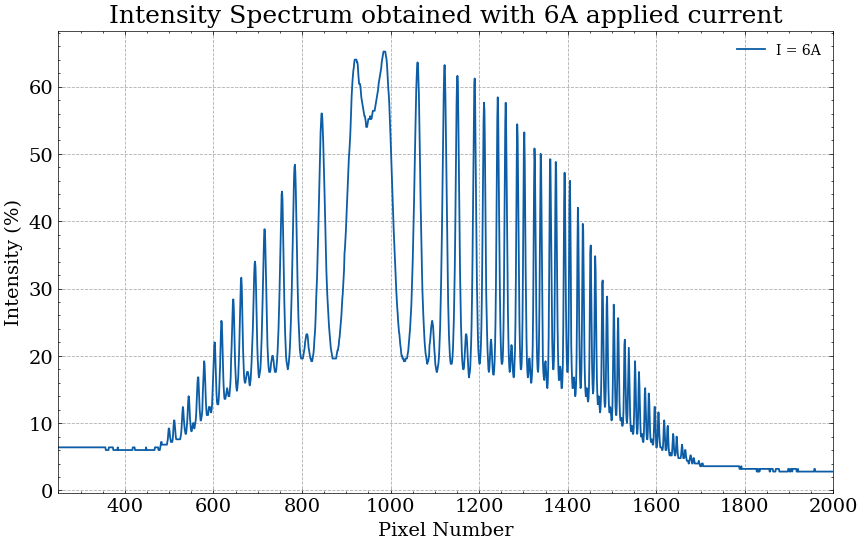

In [18]:
I6_long = pd.read_csv(r"C:\Users\Ellen Lyons\OneDrive\JS Physics\Labs\Zeeman Effect\csv files\zeeman.exp3.6A.csv")
I6_long.columns = ["Pixel Number", "Intensity"]

plt.figure(figsize=(10,6))
plt.plot(I6_long["Pixel Number"], I6_long["Intensity"], label="I = 6A",linewidth=1.3)
plt.xlabel("Pixel Number", fontsize=14)
plt.ylabel("Intensity (%)", fontsize=14)
plt.title("Intensity Spectrum obtained with 6A applied current", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.6)
plt.legend()
plt.xlim(250, 2000)

plt.show()

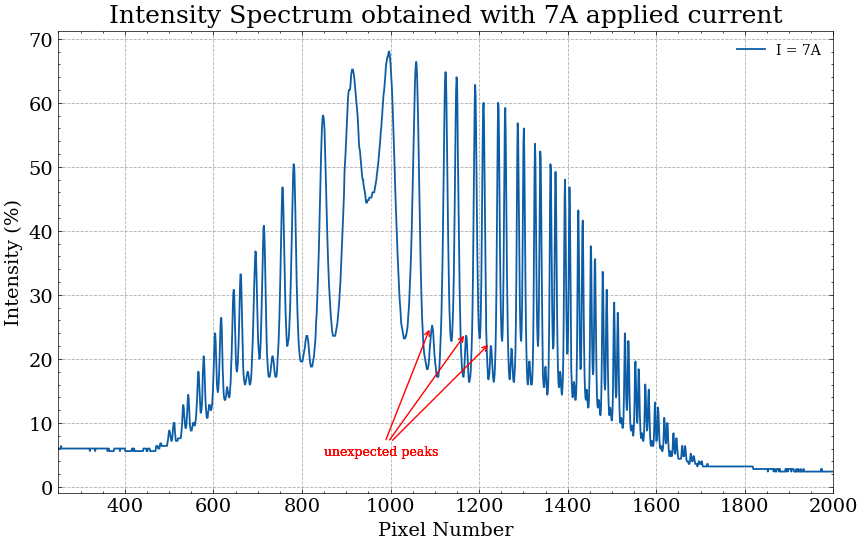

In [19]:
I7_long = pd.read_csv(r"C:\Users\Ellen Lyons\OneDrive\JS Physics\Labs\Zeeman Effect\csv files\zeeman.exp3.7A.csv")
I7_long.columns = ["Pixel Number", "Intensity"]

plt.figure(figsize=(10,6))
plt.plot(I7_long["Pixel Number"], I7_long["Intensity"], label="I = 7A",linewidth=1.3)
plt.annotate('unexpected peaks', xy=(1090,25), xytext=(850,5), arrowprops=dict(arrowstyle='->', color='red'), fontsize=9, color='red' )
plt.annotate('unexpected peaks', xy=(1170,24), xytext=(850,5), arrowprops=dict(arrowstyle='->', color='red'), fontsize=9, color='red' )
plt.annotate('unexpected peaks', xy=(1225,22.5), xytext=(850,5), arrowprops=dict(arrowstyle='->', color='red'), fontsize=9, color='red' )
plt.xlabel("Pixel Number", fontsize=14)
plt.ylabel("Intensity (%)", fontsize=14)
plt.title("Intensity Spectrum obtained with 7A applied current", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.6)
plt.legend()
#plt.ylim(0,60)
plt.xlim(250, 2000)

plt.show()

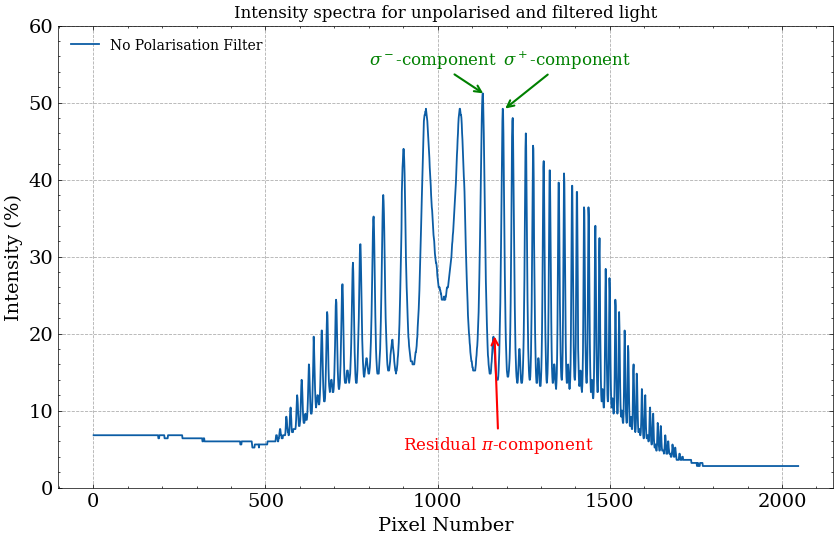

In [22]:
exp3nofilt = pd.read_csv(r"C:\Users\Ellen Lyons\OneDrive\JS Physics\Labs\Zeeman Effect\csv files\zeeman.exp3.nofilter2.csv",dtype={"Pixel Number": float, "Intensity": float})

exp3nofilt.columns = ["Pixel Number", "Intensity"]

plt.figure(figsize=(10,6))
plt.plot(exp3nofilt["Pixel Number"], exp3nofilt["Intensity"], label="No Polarisation Filter",linewidth=1.3)


plt.annotate(r'$\sigma^-$-component', xy=(1139, 51), xytext=(800, 55),
             arrowprops=dict(edgecolor = 'green', facecolor='green', arrowstyle='->', lw=1.5),
             fontsize=12, color="green")
plt.annotate(r'$\sigma^+$-component', xy=(1190, 49), xytext=(1190, 55),
             arrowprops=dict(edgecolor = 'green', facecolor='green', arrowstyle='->', lw=1.5),
             fontsize=12, color="green")
plt.annotate(r'Residual $\pi$-component', xy=(1165, 20), xytext=(900, 5),
             arrowprops=dict(edgecolor = 'red', facecolor='red', arrowstyle='->', lw=1.5),
             fontsize=12, color="red")

plt.xlabel("Pixel Number", fontsize=14)
plt.ylabel("Intensity (%)", fontsize=14)
plt.title("Intensity Spectrum obtained with no filter and 5A applied current")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.6)
plt.legend()
plt.ylim(0,60)
#plt.xlim(300,1700)

plt.show()

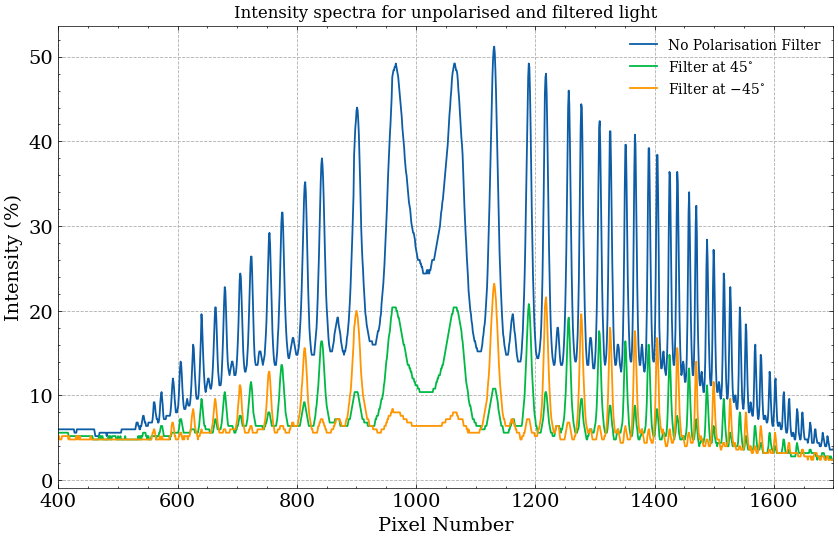

In [25]:
filt_clockwise = pd.read_csv(r"C:\Users\Ellen Lyons\OneDrive\JS Physics\Labs\Zeeman Effect\csv files\zeeman.exp3.clockwise.csv",dtype={"Pixel Number": float, "Intensity": float})
filt_clockwise.columns = ["Pixel Number", "Intensity"]

filt_anti = pd.read_csv(r"C:\Users\Ellen Lyons\OneDrive\JS Physics\Labs\Zeeman Effect\csv files\zeeman.exp3.anticlockwise.csv",dtype={"Pixel Number": float, "Intensity": float})
filt_anti.columns = ["Pixel Number", "Intensity"]

plt.figure(figsize=(10,6))
plt.plot(exp3nofilt["Pixel Number"], exp3nofilt["Intensity"], label="No Polarisation Filter",linewidth=1.3)
plt.plot(filt_clockwise["Pixel Number"], filt_clockwise["Intensity"], label=r'Filter at $45^{\circ}$',linewidth=1.3)
plt.plot(filt_anti["Pixel Number"], filt_anti["Intensity"], label=r'Filter at $-45^{\circ}$',linewidth=1.3)
plt.xlabel("Pixel Number", fontsize=14)
plt.ylabel("Intensity (%)", fontsize=14)
plt.title("Intensity spectra for unpolarised and filtered light")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.6)
plt.legend()
plt.xlim(400,1700)

plt.show()

### Further Analysis ###

Some further analysis computing $ \Delta \lambda $ values for each applied current value and finding average values, and some error calculations for use in the lab report.

In [26]:
# computing average values of delta lambda ie wavelength shift 
f = 150e-3  # focal length in meters
n = 1.457   # refractive index
wl = 643e-9 # central wavelength in meters

# array of rΔr values
rdr_5A = np.array([
0.728728,0.706629,0.6713,0.72128,0.741909,0.699426])*1e-3 #in metres 

# calculate delta lambda for each rdr
d_wl_5A =  (wl * rdr_5A) / ((n**2) * (f**2)) 
avg_5A = sum(d_wl_5A) / len(d_wl_5A)

rdr_6A = np.array([0.84084, 0.813694, 0.778708, 0.784, 0.812567, 0.77812])*1e-3
d_wl_6A =  (wl * rdr_6A) / ((n**2) * (f**2)) 
avg_6A = sum(d_wl_6A) / len(d_wl_6A)

rdr_7A = np.array([0.885969 , 0.877933 , 0.887733, 0.87808 , 0.88445 , 0.855932])*1e-3
d_wl_7A =  (wl * rdr_7A) / ((n**2) * (f**2)) 
avg_7A = sum(d_wl_7A) / len(d_wl_7A)

print(avg_5A * 1e9)  # in nm
print(avg_6A * 1e9)
print(avg_7A * 1e9)

9.578818095311918
10.78738419715936
11.82433457218211


In [27]:
# Define the paired values for transverse and longitudinal Δλ in nm
transverse = [9.58, 10.79, 11.82]
longitudinal = [9.99, 11.13, 12.04]

# Calculate average Δλ
avg_lambda = [(t + l) / 2 for t, l in zip(transverse, longitudinal)]

# Calculate % difference using average as the denominator
percent_diffs = [abs(l - t) / avg * 100 for t, l, avg in zip(transverse, longitudinal, avg_lambda)]

percent_diffs

[4.190086867654575, 3.1021897810219126, 1.8440905280804598]

In [28]:
# Δλ (nm) values for each current
delta_lambda_5A = [9.836206105, 10.27144815, 9.736476895, 10.12878915, 9.986130149, 9.951125856]
delta_lambda_6A = [11.29383767, 11.28194942, 11.26081475, 11.00719875, 10.37514011, 11.56594651]
delta_lambda_7A = [12.29245068, 11.56264421, 11.94372868, 11.87239918, 11.93778455, 12.60154519]

# Compute averages
avg_5A = sum(delta_lambda_5A) / len(delta_lambda_5A)
avg_6A = sum(delta_lambda_6A) / len(delta_lambda_6A)
avg_7A = sum(delta_lambda_7A) / len(delta_lambda_7A)

avg_5A, avg_6A, avg_7A

(9.985029384166667, 11.130814534999999, 12.035092081666667)